## Load & Explore the Dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("heart.csv")

# Display first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


 ### Features Overview
The dataset contains various attributes related to patients' medical conditions and demographics. Below is a summary of each feature:

1. Age
Type: Continuous numerical feature
Description: The age of the patient.
2. Sex
Type: Categorical (binary)
Values:
1: Male
0: Female
Description: Gender of the patient.
3. Chest Pain Type
Type: Categorical (nominal)
Values:
1: Typical angina
2: Atypical angina
3: Non-anginal pain
4: Asymptomatic
Description: Type of chest pain experienced by the patient.
4. Resting Blood Pressure
Type: Continuous numerical feature (mm Hg)
Description: The resting blood pressure (in mm Hg) of the patient.
5. Serum Cholesterol (mg/dl)
Type: Continuous numerical feature (mg/dl)
Description: The serum cholesterol level (in mg/dl) of the patient.
6. Fasting Blood Sugar > 120 mg/dl
Type: Categorical (binary)
Values:
1: True (fasting blood sugar > 120 mg/dl)
0: False (fasting blood sugar <= 120 mg/dl)
Description: Whether the patient's fasting blood sugar level is greater than 120 mg/dl.
7. Resting Electrocardiographic Results
Type: Categorical (nominal)
Values:
0: Normal
1: Having ST-T wave abnormality
2: Showing probable or definite left ventricular hypertrophy
Description: Electrocardiographic results during rest.
8. Maximum Heart Rate Achieved
Type: Continuous numerical feature
Description: The maximum heart rate achieved by the patient during exercise.
9. Exercise Induced Angina
Type: Categorical (binary)
Values:
1: Yes (exercise-induced angina present)
0: No (exercise-induced angina absent)
Description: Whether the patient experiences angina during exercise.
10. Oldpeak
Type: Continuous numerical feature
Description: ST depression induced by exercise relative to rest.
11. Slope of Peak Exercise ST Segment
Type: Categorical (nominal)
Values:
1: Upsloping
2: Flat
3: Downsloping
Description: The slope of the peak exercise ST segment.
12. Number of Major Vessels Colored by Fluoroscopy
Type: Categorical (ordinal)
Values:
0: No vessels
1: One vessel
2: Two vessels
3: Three vessels
Description: Number of major coronary vessels colored by fluoroscopy during the diagnosis.
13. Thalassemia
Type: Categorical (nominal)
Values:
0: Normal
1: Fixed defect
2: Reversible defect
Description: Thalassemia type.
Target Variable:
Target: Whether the patient has heart disease or not.
Values:
0: No heart disease
1: Heart disease present

## Exploratory Data Analysis (EDA) 🧐

In [5]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Preview the first 5 rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


Shape of the dataset: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


#### Dataset Shape:

The dataset has 1025 rows (observations) and 14 columns (features).
These 14 columns include 13 features and 1 target variable (heart disease status: 0 = no, 1 = yes).

#### No Missing Values:

The isnull().sum() output shows that there are no missing values across any of the features or the target variable. 

In [7]:
# Check data types
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


**Integer columns** (int64): These columns are storing numerical data as integers, which include:
age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal, and target.

**Floating point column**(float64):
oldpeak is stored as a float, which is likely because it can have decimal values (representing the ST depression value).

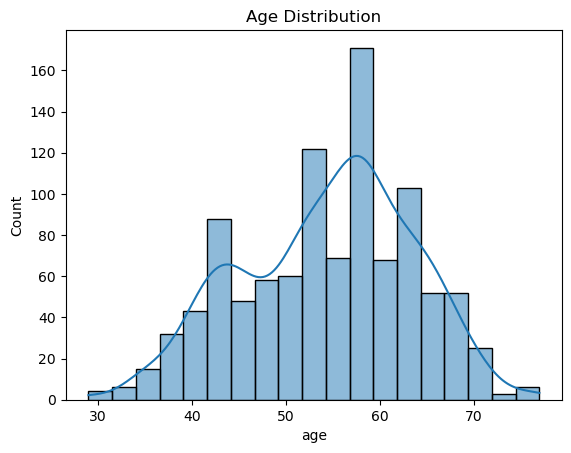

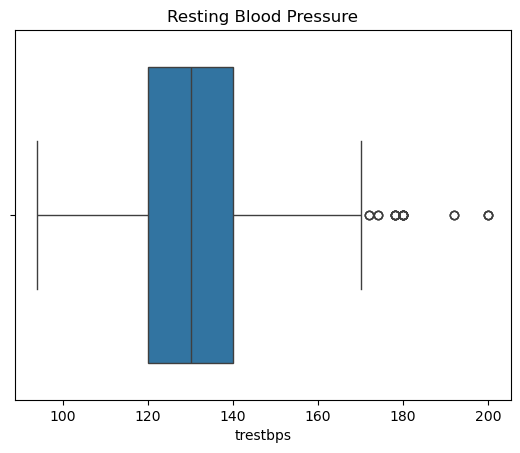

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot for Resting Blood Pressure (trestbps)
sns.boxplot(x=df['trestbps'])
plt.title('Resting Blood Pressure')
plt.show()


- A concentration of ages between 50-60 could be a reflection of the target population in the dataset. This could mean that the model will be more specialized in predicting heart disease in this age group.

- The resting blood pressure (trestbps) feature primarily ranges between 120 mmHg and 140 mmHg, with the majority of values falling within this range. This suggests that most individuals in the dataset have a resting blood pressure considered to be within a normal to slightly elevated range.

However, there are a few outliers visible in the 180-200 mmHg range, which could indicate individuals with significantly higher blood pressure. These outliers may warrant further investigation as they could represent cases with severe hypertension or other underlying health conditions

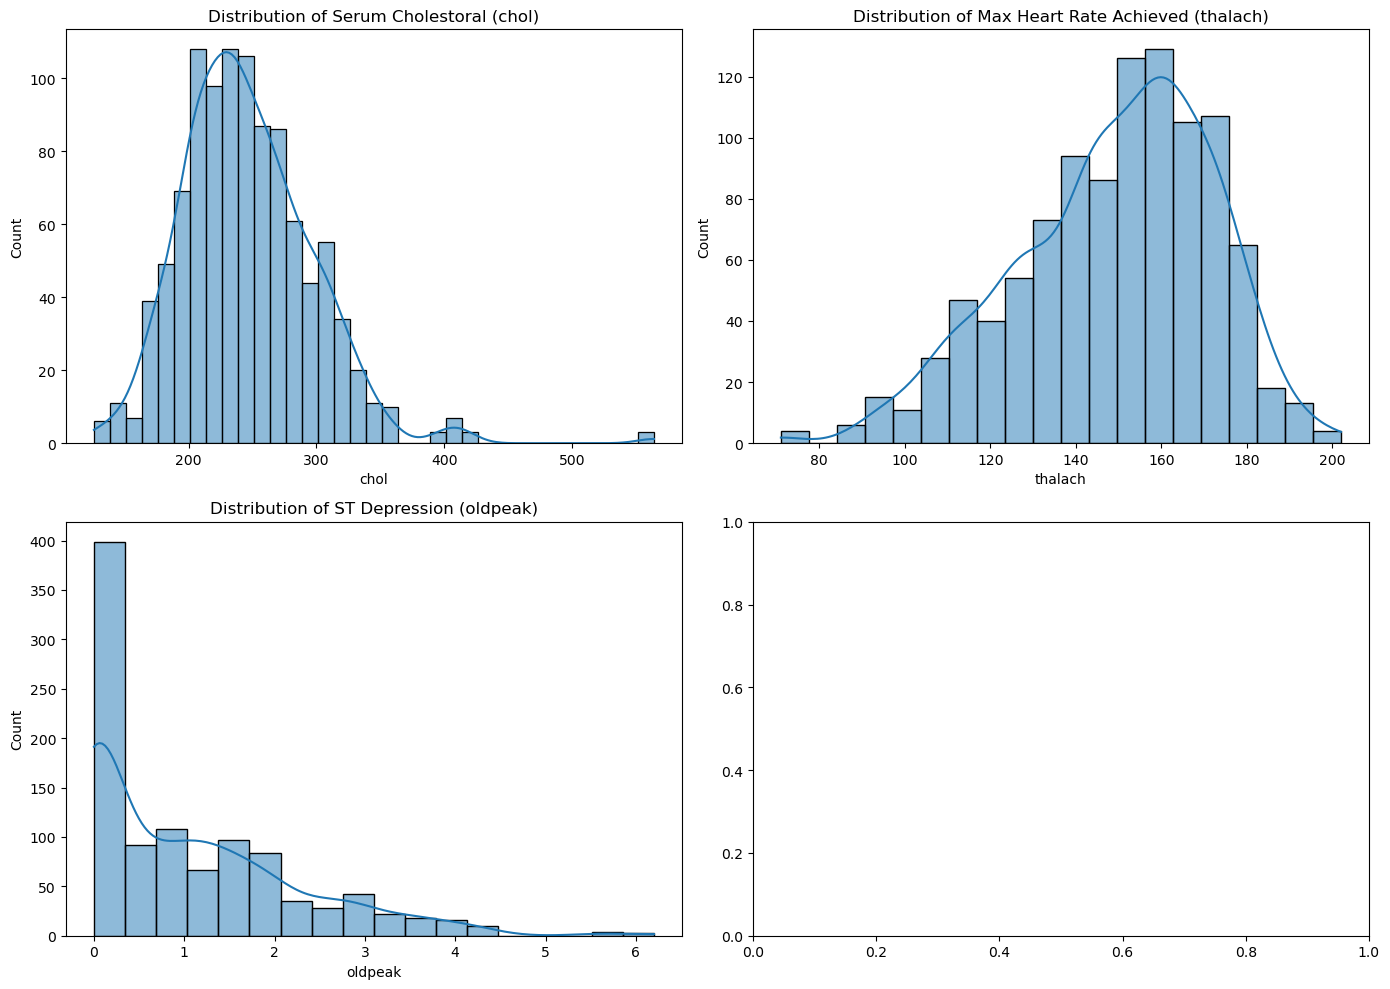

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of Serum Cholestoral (chol)
sns.histplot(df['chol'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Serum Cholestoral (chol)')

# Distribution of Maximum Heart Rate Achieved (thalach)
sns.histplot(df['thalach'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Max Heart Rate Achieved (thalach)')

# Distribution of ST Depression (oldpeak)
sns.histplot(df['oldpeak'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of ST Depression (oldpeak)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


-The distribution of the Max Heart Rate Achieved (thalach) is negatively skewed, where most of the values cluster on the higher end (indicating good heart rate performance), with a few instances of low heart rates. This suggests that most individuals have relatively high heart rates during exercise, with some exceptions.

-The distribution of ST Depression (oldpeak) is positively skewed, with most values concentrated at lower levels, indicating that most individuals have minimal depression induced by exercise. However, there are a few instances of higher depression levels, which could potentially point to certain health conditions.



## Feature Groups

In [14]:
# Continuous features (typically measured on a continuous scale)
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Categorical features (features that represent categories)
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


## Bivariate Plots for Continuous Features

For each continuous feature, we use a boxplot to show how the distribution differs between the two classes of the target variable

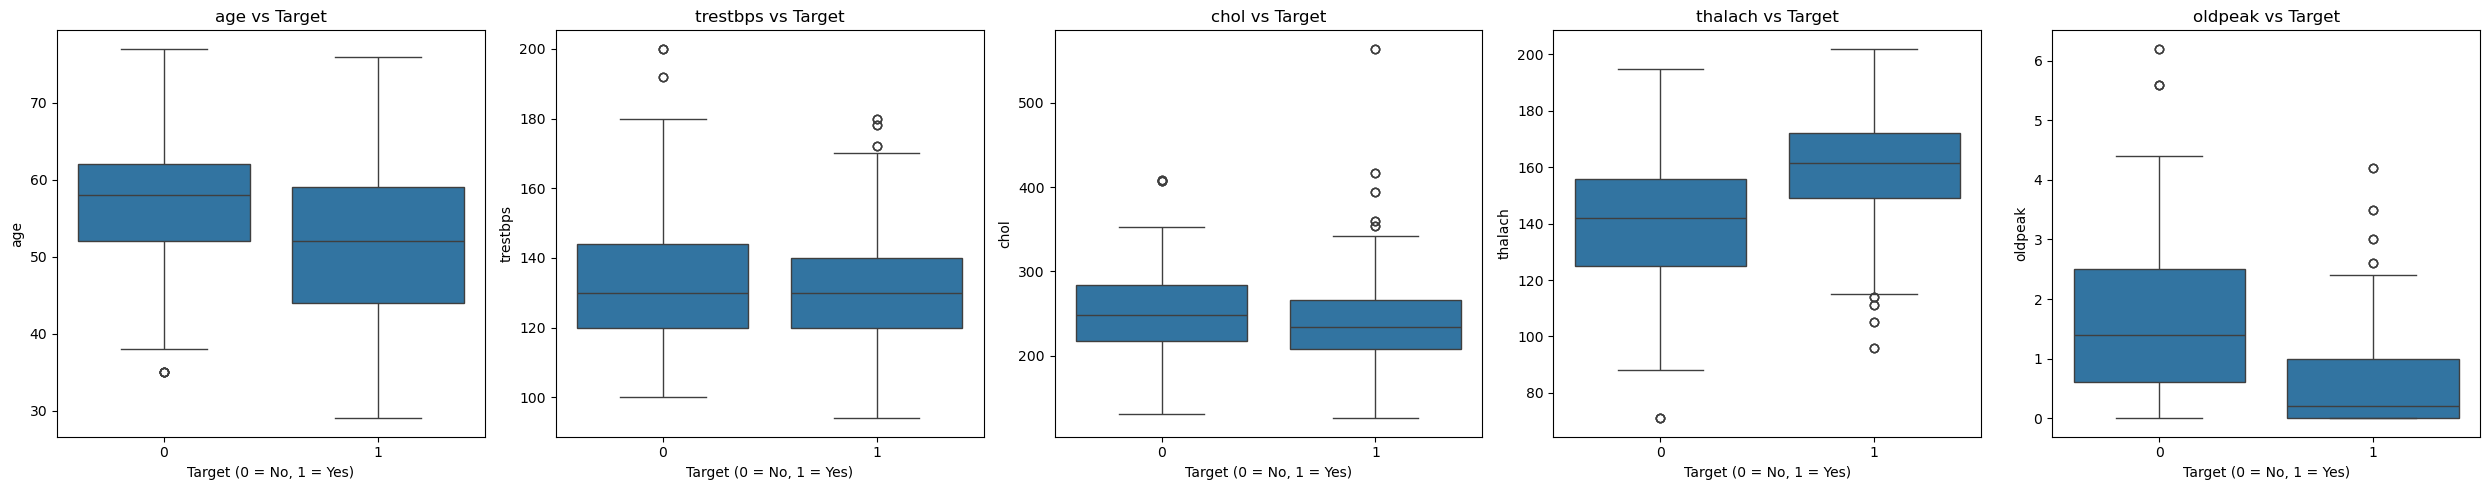

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of continuous features
num_cont = len(continuous_features)
fig, axes = plt.subplots(1, num_cont, figsize=(5 * num_cont, 5))

for ax, feature in zip(axes, continuous_features):
    sns.boxplot(x='target', y=feature, data=df, ax=ax)
    ax.set_title(f'{feature} vs Target')
    ax.set_xlabel('Target (0 = No, 1 = Yes)')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()


- People in their 45-60 are mostly in risk of heart disease.
- The boxplot of trestbps vs target shows that resting blood pressure is not enough measure to tell us about heart disease risk.
- People with cholosetrol levels above 400 tends to be more risky to develop heart disease...

## Bivariate Plots for Categorical Features
For each categorical feature, we use a countplot with a hue set to the target variable so you can see how the categories break down between those with and without heart disease.


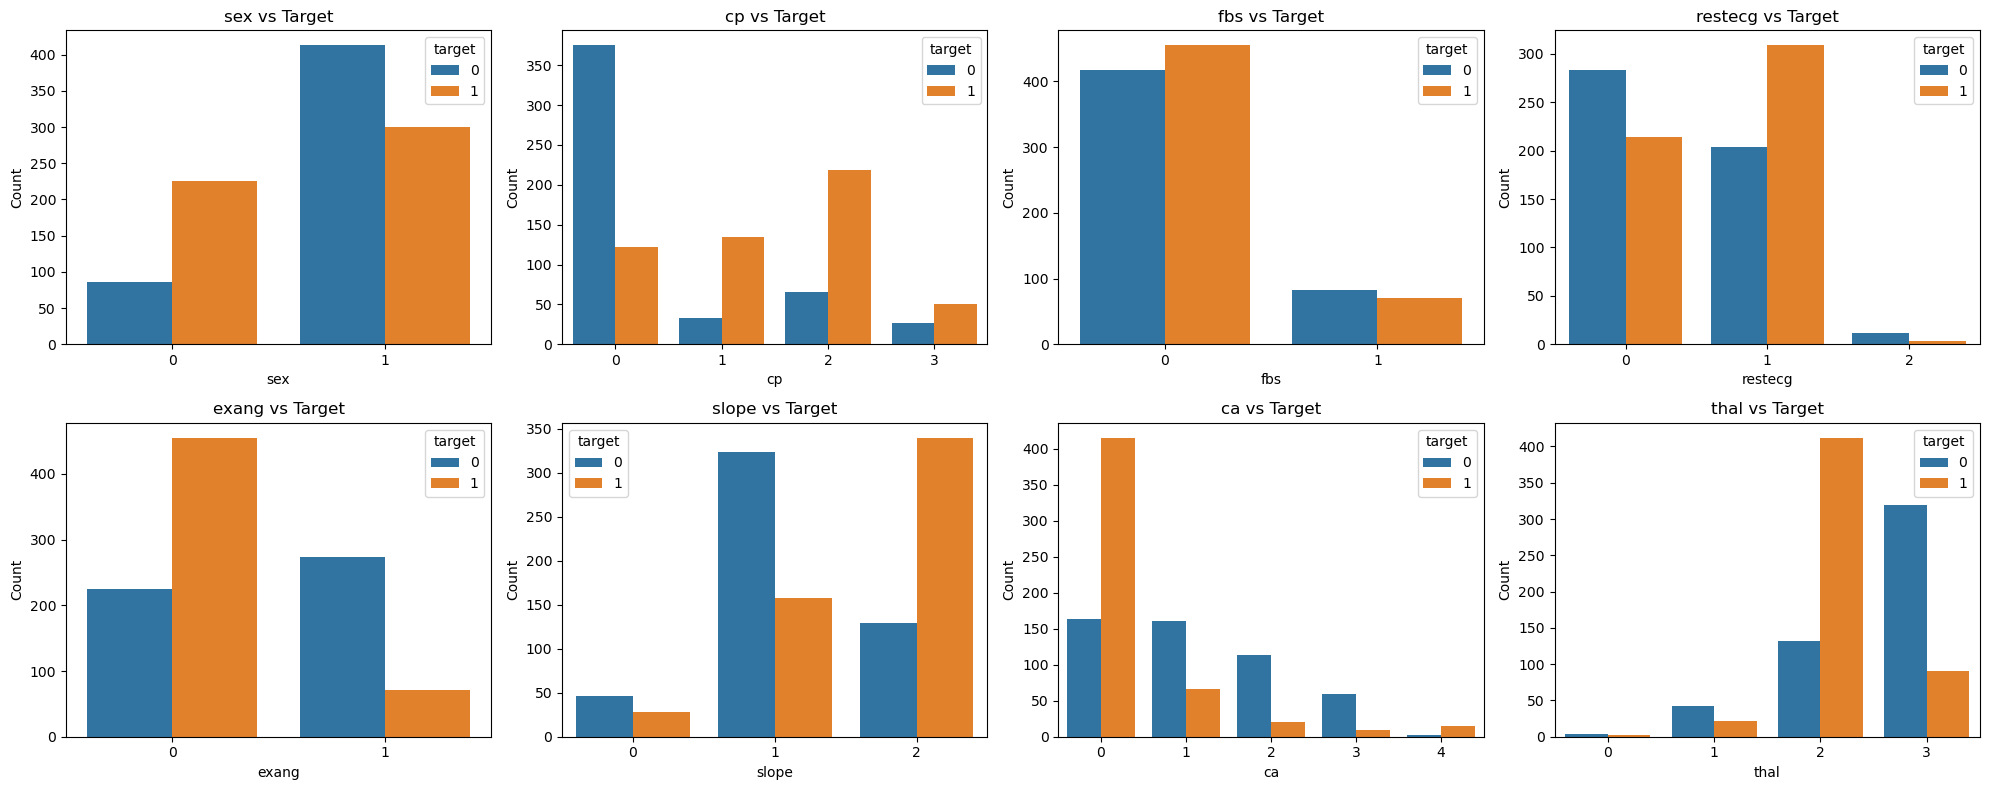

In [20]:
# Number of categorical features
num_cat = len(categorical_features)

# We can arrange them in a grid; for example, 2 rows and enough columns
cols = 4  # adjust as needed
rows = (num_cat + cols - 1) // cols  # Compute number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()  # Flatten to iterate easily

for ax, feature in zip(axes, categorical_features):
    sns.countplot(x=feature, hue='target', data=df, ax=ax)
    ax.set_title(f'{feature} vs Target')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# If there are any empty subplots, remove them
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


- Women tend to be at higher risk of heart disease than men.
- People with extreme chest pain tend to be at higher risk of the disease.
- People with fixed defect thal tend to be at higher risk of heart disease...

## Data Preprocessing

In [23]:
from scipy.stats import zscore
# Function to detect outliers using Z-score
def detect_outliers_zscore(df, continuous_features, threshold=3):
    outliers = pd.DataFrame(index=df.index)
    for column in continuous_features:
        z_scores = zscore(df[column])
        outliers[column] = abs(z_scores) > threshold
    return outliers

# Function to detect outliers using IQR
def detect_outliers_iqr(df, continuous_features):
    outliers = pd.DataFrame(index=df.index)
    for column in continuous_features:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# Detect outliers using Z-score method for continuous features
outliers_zscore = detect_outliers_zscore(df, continuous_features)

# Detect outliers using IQR method for continuous features
outliers_iqr = detect_outliers_iqr(df, continuous_features)

# Combine both outlier detections
combined_outliers = outliers_zscore | outliers_iqr

# Handling outliers by removing them (optional)
df_no_outliers = df[~combined_outliers.any(axis=1)]

# Handling outliers by clipping them (optional)
def clip_outliers(df, continuous_features):
    for column in continuous_features:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

df_clipped = clip_outliers(df.copy(), continuous_features)

# Output
print("Outliers detected using Z-score and IQR methods:")
print(combined_outliers[continuous_features].sum())

print("Number of rows after removing outliers:", df_no_outliers.shape[0])
print("Number of rows after clipping outliers:", df_clipped.shape[0])


Outliers detected using Z-score and IQR methods:
age          0
trestbps    30
chol        16
thalach      4
oldpeak      7
dtype: int64
Number of rows after removing outliers: 968
Number of rows after clipping outliers: 1025


In [24]:
for feature in categorical_features:
    print(f"Unique values for {feature}: {df_clipped[feature].unique()}")

Unique values for sex: [1 0]
Unique values for cp: [0 1 2 3]
Unique values for fbs: [0 1]
Unique values for restecg: [1 0 2]
Unique values for exang: [0 1]
Unique values for slope: [2 0 1]
Unique values for ca: [2 0 1 3 4]
Unique values for thal: [3 2 1 0]


In [25]:
from sklearn.preprocessing import PowerTransformer
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# Apply PowerTransformer to thalach and oldpeak to fix skewness
pt = PowerTransformer(method='yeo-johnson')
df_clipped[['thalach', 'oldpeak']] = pt.fit_transform(df_clipped[['thalach', 'oldpeak']])

continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  # Use transformed columns
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Define target variable
target_variable = 'target'

# Split features (X) and target (y)
X = df_clipped.drop(columns=[target_variable])
y = df_clipped[target_variable]

# Define preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), continuous_features),  # Scale continuous features
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-Hot Encode categorical features
])


with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)


# Apply transformations
X_preprocessed = preprocessor.fit_transform(X)

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

# Display results
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (820, 30)
Testing set shape: (205, 30)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Initialize Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8732

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       100
           1       0.86      0.90      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205


Confusion Matrix:
[[84 16]
 [10 95]]


In [ ]:
# Hyperparameter tuning for Logistic Regression using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solvers to try
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Make predictions
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nBest Model Accuracy: {accuracy_best:.4f}")
print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_best))
print("\nBest Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Fitting 5 folds for each of 8 candidates, totalling 40 fits


## Feature Selection

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_clipped.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Set the correlation threshold and target variable
target = 'target'  # Replace with the actual name of your target column
threshold = 0.30

# Calculate the correlation of each feature with the target
target_corr = df_clipped.corr()[target]

# Filter the features that have correlation >= 0.30 or <= -0.30 with the target
relevant_features = target_corr[abs(target_corr) >= threshold].index

# Display the relevant features
print(f"Features with correlation >= 0.30 with the target: {relevant_features}")

# Update the dataset to keep only relevant features (including the target column)
df_selected = df_clipped[relevant_features]

# Check the shape of the updated dataset
print(f"Updated dataset shape: {df_selected.shape}")


## Model Developement

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the feature set and target variable
X = df_selected.drop(columns=[target])  # Feature set (all columns except the target)
y = df_selected[target]  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
# Initialize the model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
with open('heart_disease_model.pkl', 'wb') as f:
    pickle.dump(model, f)